<a href="https://colab.research.google.com/github/Milena177/churn_analisis/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [123]:
import pandas as pd
import requests
import json
ventas = pd.read_json('TelecomX_Data.json')
ventas

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [124]:


# Suponiendo que 'ventas' es el DataFrame original completo

# Expandimos cada columna sin sobrescribir 'ventas'
customer_df = pd.json_normalize(ventas['customer'])
phone_df = pd.json_normalize(ventas['phone'])
internet_df = pd.json_normalize(ventas['internet'])
account_df = pd.json_normalize(ventas['account'])

# Concatenamos todo junto con las columnas básicas
ventas_limpio = pd.concat(
    [ventas[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df],
    axis=1
)

ventas_limpio.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [125]:
ventas_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#🔧 Transformación

In [126]:
ventas_limpio.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [127]:
ventas_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [128]:
ventas_limpio.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [129]:
ventas_limpio['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [130]:
ventas_limpio['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3198
DSL,2488
No,1581


In [131]:
ventas_limpio['Contract'].value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [132]:
ventas_limpio['Cuentas_Diarias'] = ventas_limpio['Charges.Monthly']/30
ventas_limpio.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


In [133]:
mapa_si_no = {'Yes': 1, 'No': 0}
for columna in ventas_limpio.columns:
    if ventas_limpio[columna].dtype == 'object':
        if ventas_limpio[columna].isin(['Yes', 'No']).any():
          ventas_limpio[columna] = ventas_limpio[columna].map(mapa_si_no)


ventas_limpio.head()



,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,NaN,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,NaN,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,NaN,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,NaN,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,NaN,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.4,2.796667


#📊 Carga y análisis

In [134]:
ventas_limpio.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Cuentas_Diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,6560.000000,1581.0,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.467226,0.0,0.365459,0.440380,0.438094,0.370032,0.490679,0.495251,0.593230,64.720098,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.498963,0.0,0.481601,0.496476,0.496196,0.482855,0.499957,0.500021,0.491265,30.129572,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,3.958333


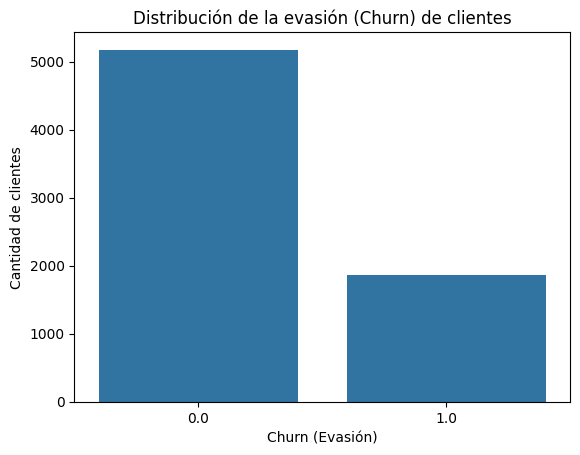

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(data=ventas_limpio, x='Churn')

plt.title('Distribución de la evasión (Churn) de clientes')
plt.xlabel('Churn (Evasión)')
plt.ylabel('Cantidad de clientes')
plt.show()


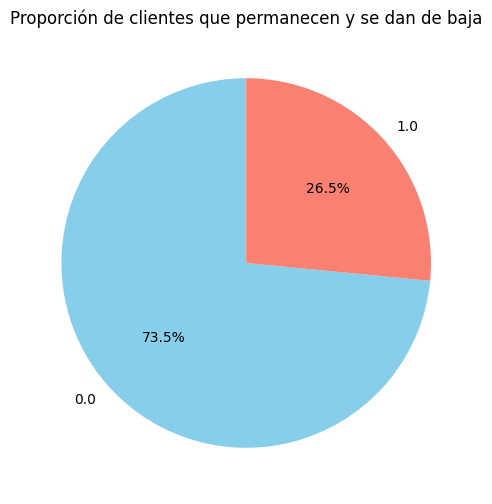

In [136]:



churn_counts = ventas_limpio['Churn'].value_counts()


plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Proporción de clientes que permanecen y se dan de baja')
plt.savefig('churn.png', dpi=300, bbox_inches='tight')
plt.show()


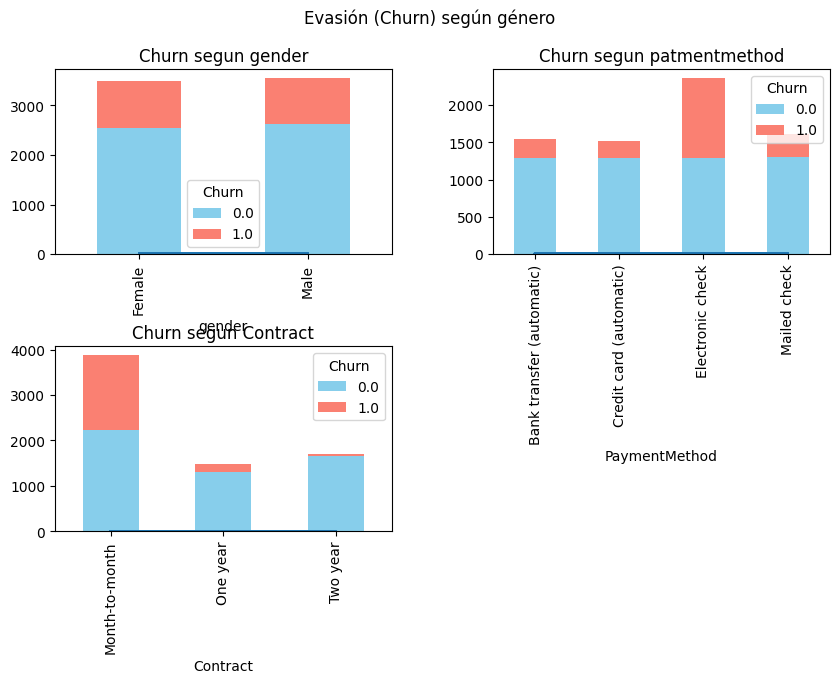

In [137]:
fig, axs = plt.subplots(2,2,figsize=(10,6))
fig.subplots_adjust(hspace=0.5,wspace=0.3)
fig.suptitle('Evasión (Churn) según género')

pd.crosstab(ventas_limpio['gender'], ventas_limpio['Churn']).plot(
    kind='bar', stacked=True, ax=axs[0,0], color=['skyblue', 'salmon'])
axs[0,0].plot(ventas_limpio['gender'], ventas_limpio['Churn'])
axs[0,0].set_title('Churn segun gender')

pd.crosstab(ventas_limpio['PaymentMethod'], ventas_limpio['Churn']).plot(
    kind='bar', stacked=True, ax=axs[0,1], color=['skyblue', 'salmon']
)
axs[0,1].plot(ventas_limpio['PaymentMethod'],ventas_limpio['Churn'])
axs[0,1].set_title('Churn segun patmentmethod')

pd.crosstab(ventas_limpio['Contract'], ventas_limpio['Churn']).plot(
    kind='bar', stacked=True, ax=axs[1,0], color=['skyblue', 'salmon']
)
axs[1,0].plot(ventas_limpio['Contract'],ventas_limpio['Churn'])
axs[1,0].set_title('Churn segun Contract')


axs[1,1].axis('off')
plt.show()

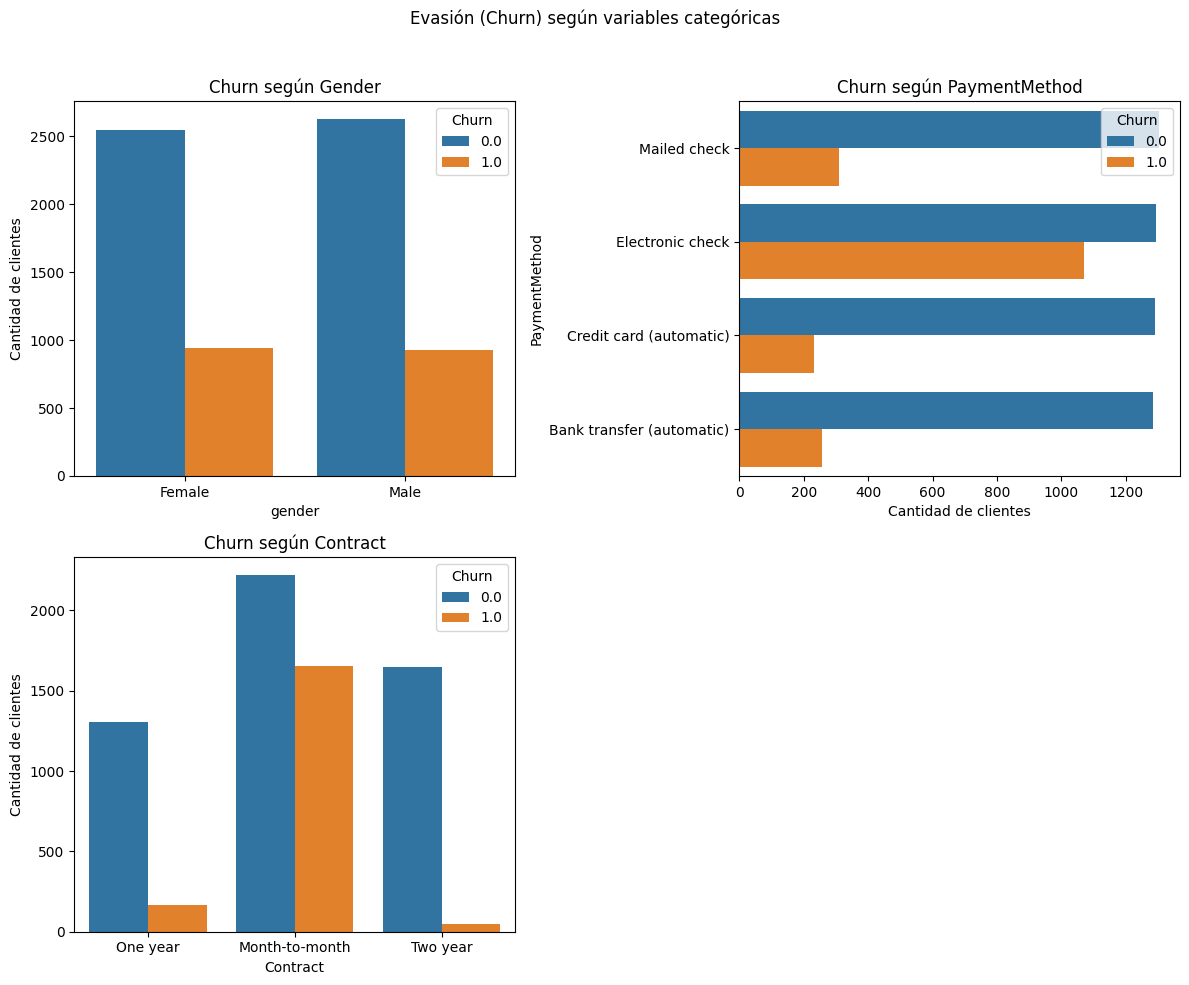

<Figure size 640x480 with 0 Axes>

In [138]:

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
fig.suptitle('Evasión (Churn) según variables categóricas')

sns.countplot(data=ventas_limpio, x='gender', hue='Churn', ax=axs[0, 0])
axs[0, 0].set_title('Churn según Gender')
axs[0, 0].set_ylabel('Cantidad de clientes')

sns.countplot(data=ventas_limpio, y='PaymentMethod', hue='Churn', ax=axs[0, 1])
axs[0, 1].set_title('Churn según PaymentMethod')
axs[0, 1].set_xlabel('Cantidad de clientes')


sns.countplot(data=ventas_limpio, x='Contract', hue='Churn', ax=axs[1, 0])
axs[1, 0].set_title('Churn según Contract')
axs[1, 0].set_ylabel('Cantidad de clientes')

axs[1, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.grid()
plt.show()

plt.savefig('churn_genero.png', dpi=300, bbox_inches='tight')
plt.show()


In [141]:
ventas_limpio['Charges.Total'] = pd.to_numeric(ventas_limpio['Charges.Total'], errors='coerce')


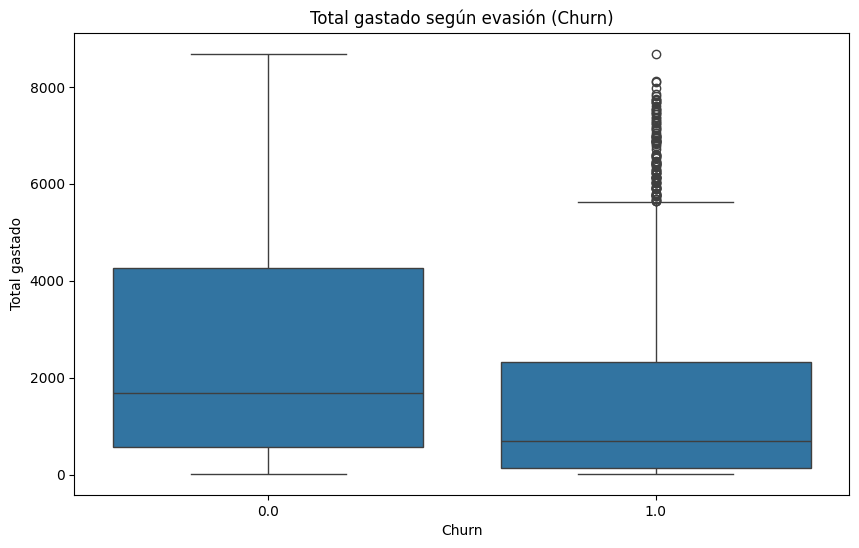

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=ventas_limpio, x='Churn', y='Charges.Total')
plt.title('Total gastado según evasión (Churn)')
plt.xlabel('Churn')
plt.ylabel('Total gastado')
plt.show()


#📄Informe final


# Informe de Análisis de Evasión de Clientes (Churn)

## Introducción

El presente informe detalla el análisis realizado sobre un conjunto de datos de clientes de una empresa, con el **objetivo principal de identificar los factores clave que impulsan la evasión de clientes**, comúnmente conocida como *Churn*.

El Churn es una métrica crítica para cualquier negocio basado en suscripciones, ya que representa la tasa a la que los clientes cancelan sus servicios. Un alto índice de Churn puede impactar negativamente los ingresos y la sostenibilidad del negocio, considerando que adquirir un nuevo cliente es significativamente más costoso que retener a uno existente.

Este análisis busca desglosar las características y comportamientos de los clientes que se dan de baja para poder proponer estrategias efectivas que ayuden a reducir esta tasa y mejorar la retención. Según el análisis inicial, la empresa enfrenta una tasa de evasión del **26.5%**, un número considerable que justifica una investigación profunda.

##  Limpieza y Tratamiento de Datos

Para llevar a cabo el análisis, se ejecutó un detallado proceso de preparación de los datos, que incluyó los siguientes pasos clave:

1.  **Importación y Normalización:** Se importó el dataset proporcionado en formato estructurado. Una tarea crucial fue identificar columnas que contenían datos anidados (en formato de diccionario o JSON), las cuales fueron **normalizadas** utilizando la función `json_normalize` de Pandas para aplanar la estructura y facilitar su manipulación.
2.  **Conversión de Tipos de Datos:** La columna `Charges.Total`, que originalmente era de tipo `object` (texto), fue **convertida a un formato numérico** para permitir cálculos agregados y análisis cuantitativos.
3.  **Codificación de Variables Binarias:** Las variables categóricas con respuestas "Yes" y "No" (como la propia columna 'Churn') fueron **transformadas a un formato numérico (1 y 0, respectivamente)** para estandarizar los datos.
4.  **Manejo de Columnas no Válidas:** Se aplicó un tratamiento para eliminar o convertir columnas que, tras la importación inicial, contenían valores no numéricos o faltantes que impedían el análisis.
5.  **Ingeniería de Características (Feature Engineering):** Se creó una nueva columna llamada `Cuentas_Diarias`. Esta representa el costo diario estimado del servicio para cada cliente y fue calculada a partir de la columna `Charges.Monthly` (probablemente dividiéndola por 30) para obtener una perspectiva de costo a corto plazo.

##  Análisis Exploratorio de Datos

Se realizaron análisis visuales para explorar la relación entre diferentes atributos de los clientes y su propensión a la evasión.

### Perfil Demográfico

No se encontraron diferencias significativas en la tasa de Churn basadas en el género del cliente. Tanto hombres como mujeres muestran una proporción de evasión muy similar, lo que sugiere que el género no es un factor determinante para la retención en este caso.

### Características del Contrato y Métodos de Pago

Aquí es donde se identifican los patrones más fuertes:

  * **Tipo de Contrato:** Existe una correlación muy fuerte entre la duración del contrato y la lealtad del cliente. Los clientes con **contratos mes a mes (Month-to-month)** tienen una tasa de evasión drásticamente más alta en comparación con aquellos con contratos de uno o dos años, quienes rara vez abandonan el servicio.
  * **Método de Pago:** Los clientes que utilizan **cheque electrónico (Electronic check)** como método de pago presentan la tasa de Churn más elevada. Por el contrario, aquellos con métodos de pago automáticos, como **transferencia bancaria (Bank transfer)** o **tarjeta de crédito (Credit card)**, son significativamente más propensos a permanecer en la compañía.

### Comportamiento de Gasto

El análisis del gasto total acumulado por cliente también revela un patrón claro:

  * **Total Gastado (Total Charges):** El box plot muestra que los clientes que **se dan de baja (Churn = 1.0)** tienden a tener un gasto total acumulado significativamente menor. La mediana del gasto total para los clientes que se van es considerablemente más baja que la de los clientes que se quedan. Esto podría indicar que los clientes que abandonan son más nuevos o tienen planes de menor valor.

## Conclusiones e Insights

El análisis exploratorio nos permite perfilar claramente a los clientes con mayor y menor riesgo de evasión:

  * **Perfil de Alto Riesgo de Churn:** Un cliente con alta probabilidad de abandonar el servicio típicamente tiene un **contrato mes a mes**, paga mediante **cheque electrónico** y ha acumulado un **gasto total bajo** con la compañía.
  * **Perfil de Cliente Leal:** Un cliente leal suele tener un **contrato a largo plazo (uno o dos años)**, utiliza **métodos de pago automáticos** y, en consecuencia, tiene un mayor valor de vida o gasto total acumulado.
  * **Factor no Relevante:** El **género** no parece influir en la decisión del cliente de permanecer o abandonar el servicio.

La evasión no está distribuida de manera uniforme, sino concentrada en segmentos de clientes muy específicos, lo cual es una excelente noticia porque permite dirigir los esfuerzos de retención de manera más eficiente.

##  Recomendaciones

Basado en los hallazgos anteriores, se proponen las siguientes acciones estratégicas para reducir la tasa de Churn:

1.  **Incentivar Contratos a Largo Plazo:**

      * Lanzar campañas de marketing dirigidas a los clientes con contratos mes a mes, ofreciéndoles descuentos atractivos o beneficios adicionales (ej. un mes gratis, mejora de servicio) si migran a un contrato de uno o dos años.

2.  **Fomentar Métodos de Pago Automáticos:**

      * Crear un programa de incentivos para que los clientes, especialmente los que usan cheque electrónico, se cambien a pagos automáticos con tarjeta de crédito o transferencia bancaria. Un pequeño descuento mensual (ej. $1-$2 de ahorro) por registrarse en autopago puede ser muy efectivo.
      * Investigar si el proceso de pago con cheque electrónico presenta fricciones o problemas que frustren al cliente y lo impulsen a cancelar.

3.  **Estrategias de Retención Proactiva:**

      * Utilizar los perfiles identificados para crear un "sistema de alerta temprana". Contactar proactivamente a los clientes que combinan un contrato mes a mes y pago con cheque electrónico antes de que decidan irse.
      * Para clientes con bajo gasto total (posiblemente nuevos), implementar un programa de *onboarding* robusto para asegurar que entiendan el valor del servicio y se sientan comprometidos desde el principio.

La implementación de estas estrategias, enfocadas en los factores de mayor impacto, debería resultar en una reducción medible de la tasa de evasión y un aumento en la retención de clientes valiosos.